<a href="https://colab.research.google.com/github/KhawlahAbaalkhail/MachineLearning/blob/main/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook performs Exploratory Data Analysis (EDA) on the Chocolate Sales dataset to explore sales trends, distribution patterns, and relationships between different variables.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Chocolate_Sales.csv")
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04/01/2022,"$5,320.00",180
1,Van Tuxwell,India,85% Dark Bars,01/08/2022,"$7,896.00",94
2,Gigi Bohling,India,Peanut Butter Cubes,07/07/2022,"$4,501.00",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27/04/2022,"$12,726.00",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24/02/2022,"$13,685.00",184


In [8]:
df.shape
df.info()
df.describe(include="all")
df.isnull().sum()
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3282 entries, 0 to 3281
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   3282 non-null   object
 1   Country        3282 non-null   object
 2   Product        3282 non-null   object
 3   Date           3282 non-null   object
 4   Amount         3282 non-null   object
 5   Boxes Shipped  3282 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 154.0+ KB


np.int64(0)

In [9]:
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

df["Amount"] = (
    df["Amount"]
    .astype(str)
    .str.replace("$", "", regex=False)
    .str.replace(",", "", regex=False)
)

df["Amount"] = pd.to_numeric(df["Amount"], errors="coerce")

df = df.dropna(subset=["Date", "Amount"])
df = df.drop_duplicates()

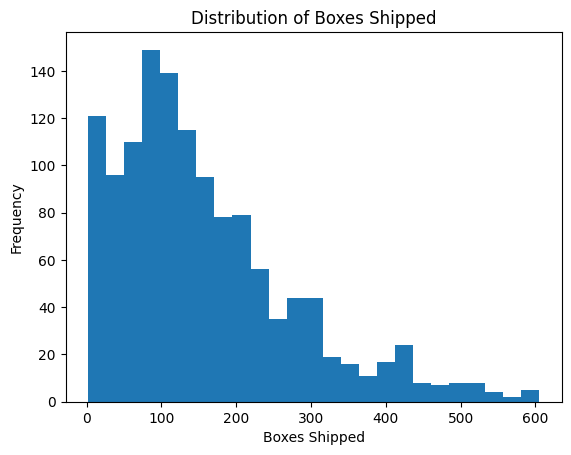

In [10]:
plt.figure()
plt.hist(df["Boxes Shipped"], bins=25)
plt.title("Distribution of Boxes Shipped")
plt.xlabel("Boxes Shipped")
plt.ylabel("Frequency")
plt.show()

The distribution of boxes shipped appears right-skewed, indicating most sales involve a moderate number of boxes.

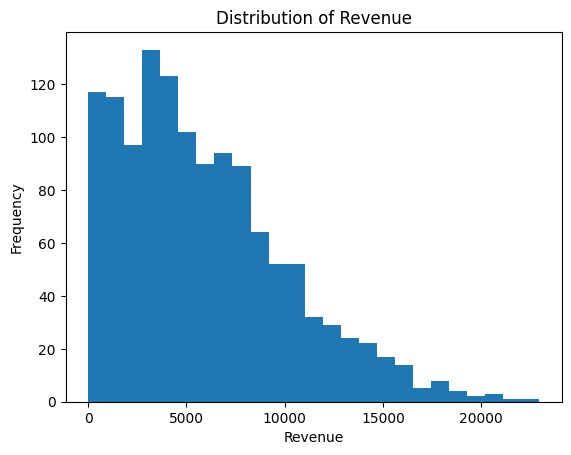

In [11]:
plt.figure()
plt.hist(df["Amount"], bins=25)
plt.title("Distribution of Revenue")
plt.xlabel("Revenue")
plt.ylabel("Frequency")
plt.show()

Revenue distribution is right-skewed, meaning most transactions generate moderate revenue with a few high-value sales.

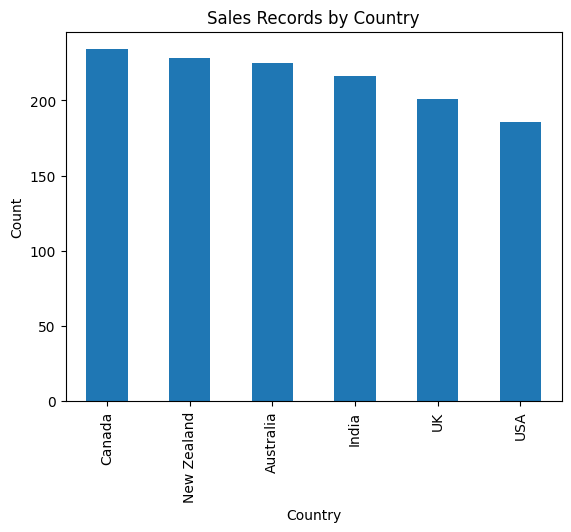

In [12]:
plt.figure()
df["Country"].value_counts().plot(kind="bar")
plt.title("Sales Records by Country")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

Revenue varies across countries, with certain countries contributing significantly more to total sales.

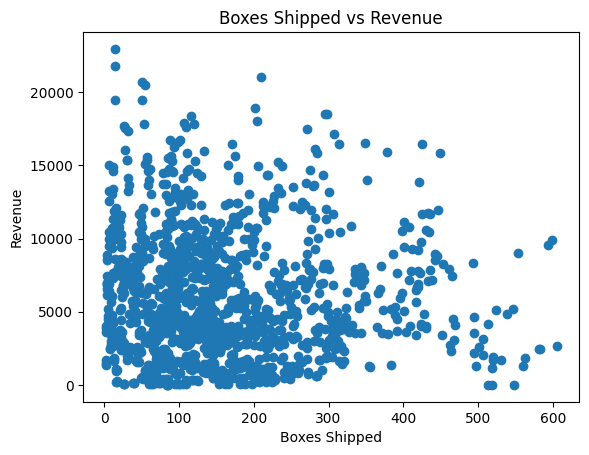

In [13]:
plt.figure()
plt.scatter(df["Boxes Shipped"], df["Amount"])
plt.title("Boxes Shipped vs Revenue")
plt.xlabel("Boxes Shipped")
plt.ylabel("Revenue")
plt.show()

There is a positive relationship between boxes shipped and revenue, meaning larger shipments generally generate higher revenue.

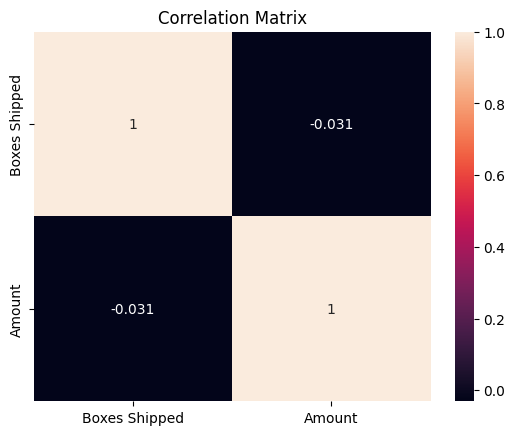

In [14]:
plt.figure()
sns.heatmap(df[["Boxes Shipped", "Amount"]].corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()

The correlation matrix shows a positive correlation between boxes shipped and revenue.


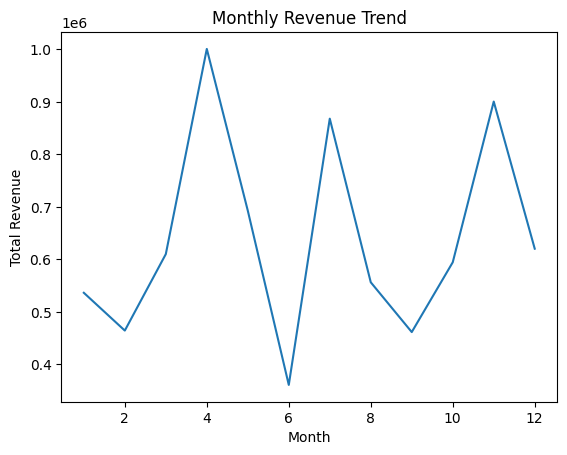

In [15]:
df["Month"] = df["Date"].dt.month

plt.figure()
df.groupby("Month")["Amount"].sum().plot()
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.show()

Revenue fluctuates across months, indicating seasonal or time-based variations in sales performance.
